# Random Walk Simulation Of Stock Prices Using Geometric Brownian Motion

In [2]:
# Import the necessary libraries
!pip install yfinance
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the price data of General Motors

df = yf.download('GM','2008-01-02', '2020-2-27')
df['Adj Close'].plot(figsize=(10,7))
plt.legend()
plt.grid()
plt.show()
df.tail()

  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\f9\e3\5b\ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\37\fa\73\d492849e319038eb4d986f5152e4b19ffb1bc0639da84d2677
Successfully built yfinance multitasking
[*********************100%***********************]  1 of 1 completed


<Figure size 1000x700 with 1 Axes>

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-20,34.660000,35.400002,34.590000,35.290001,34.864685,7817900
2020-02-21,34.990002,35.080002,34.410000,34.650002,34.232399,8431500
2020-02-24,33.639999,33.750000,32.790001,33.090000,32.691200,14743100
2020-02-25,33.250000,33.279999,31.400000,31.750000,31.367350,14621900
2020-02-26,32.099998,32.610001,31.889999,32.000000,31.614336,14421900


In [102]:
# Calculate the daily percentage change, mean and sigma
df['daily_pct_change'] = df['Adj Close'].pct_change()
mu = df['daily_pct_change'].iloc[:-252].mean()
sigma = df['daily_pct_change'].iloc[:-252].std()

# Creating the random walk simulation of the probable price path
simulation = {}
simulation['Actual'] = list(df['Adj Close'].iloc[-252:].values)

for sim in range(1,10): # Taking 10 paths
    simulation["Simulation_"+str(sim)] = [df['Adj Close'].iloc[-252]]
    for days in range(251):
        next_day = simulation["Simulation_"+str(sim)][-1]*np.exp((mu-(sigma**2/2))+sigma*np.random.normal())
        simulation["Simulation_"+str(sim)].append(next_day)

Text(0, 0.5, 'Price')

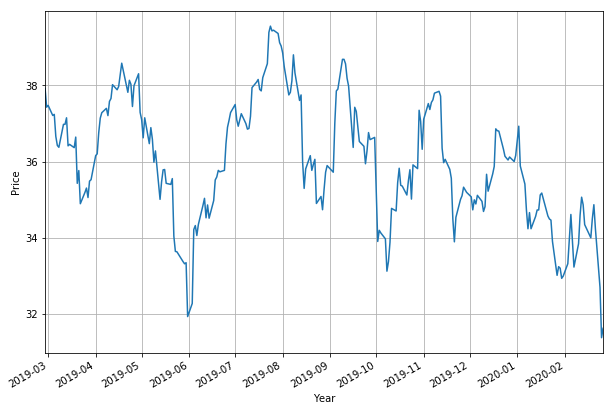

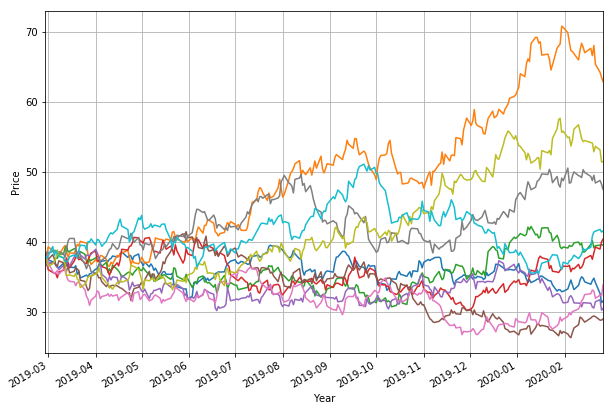

In [103]:
# Plotting the actual Adjusted Close price of General Motors
df['Adj Close'][-252:].plot(figsize=(10,7),grid=True,legend=False)
plt.xlabel('Year')
plt.ylabel('Price')

# Plotting the simulation of random walk

simulation=pd.DataFrame(simulation)
simulation.index=df[-252:].index
simulation.plot(figsize=(10,7),grid=True,legend=False)
plt.xlabel('Year')
plt.ylabel('Price')